<h1><center> MODEL STASIONER </center></h1><center>Laily Nissa A.Mualifah </center>

<center>
_____________________________________________________________________________________________________________________________
</center>


<h1> Rataan Bergerak (Moving Average) </h1>

Diberikan suatu deret waktu ${Y_t}$, dan deret white noise yang tidak teramati ${e_t}$, yaitu barisan peubah acak yang saling bebas dan memiliki sebaran identik dengan nilai tengah nol.

Proses rataan bergerak (moving average) secara umum atau MA (q) dapat dinyatakan dalam model sebagai berikut:

<center> $Y_t=e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}-...-\theta_q e_{t-q}$</center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

## MA (1)

Proses MA(1) memiliki persamaan:

<center> $Y_t=e_t-\theta e_{t-1}$ </center>

Kita akan membuat simulasi proses MA(1) dengan $\theta=-0.9$.

In [3]:
np.random.seed(1302)
ar1 = np.array([1]) #ar 1 komponen
ma1 = np.array([1, 0.9]) # 2 komponen dan salah satunya parameter theta yang digunakan untuk simulasi
ma_object1 = ArmaProcess(ar1,ma1)
ma1 = ma_object1.generate_sample(nsample=120) #nsample panjang amatan

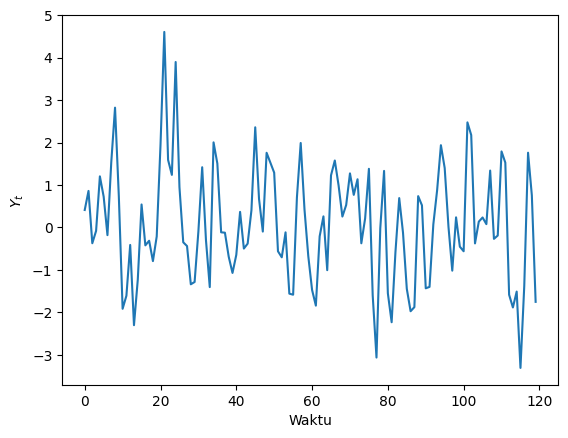

In [4]:
plt.figure()
plt.plot(ma1)
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

Bagaimana interpretasi Anda mengenai plot di atas?

Tidak ada kecenderungan dari plot tersebut baik linier, musiman atau yang lainnya. Ragamnya terlihat juga jaraknya sama sehingga data tersebut stasioner. Namun untuk memastikan bisa dilakukan pengujian kestasioneran data. Berbicara kestasioneran berarti akan berbicara spesifik ke model deret waktu.

Untuk melihat apakah terdapat hubungan dalam deret antar waktu kita lihat dari plot pencar data berpasangan.

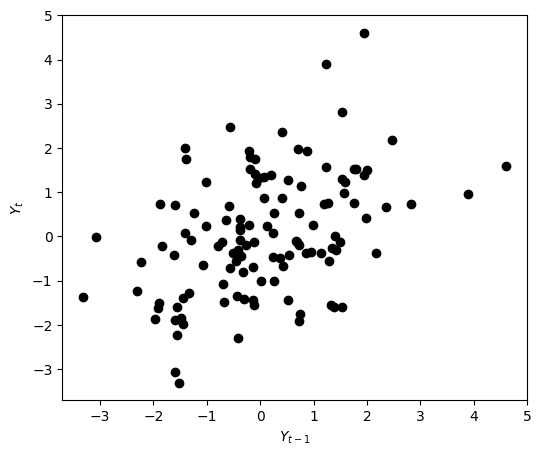

In [5]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma1), lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Apa interpretasi Anda?

Ada autokorelasi positif yang terlihat pada plot pencar. Secara konsep MA1 autokorelasi nilainya positif yaitu rho1 = gamma1/gamma0 = mines theta dibagi (1+thtea^2).

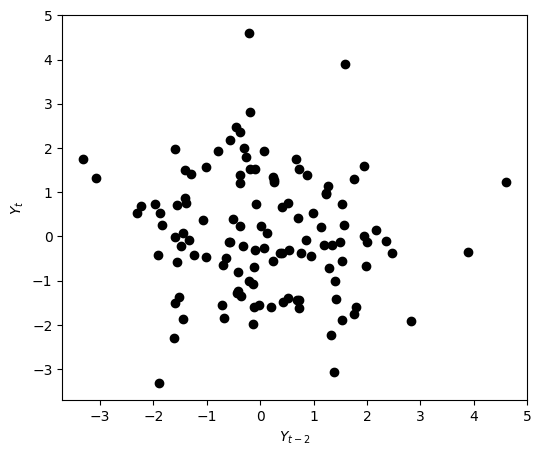

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma1), lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Bagaimana interpretasi Anda dari plot-plot di atas?

Lag 2 dan seterusnya pasti sudah acak sesuai konsep MA

Selain menggunakan plot pencar data berpasangan nilai autokorelasi dapat kita lihat menggunaka **plot ACF (*Autocorelation Function*) contoh**. Plot ACF contoh dapat kita gunakan untuk menentukan order dari proses MA.

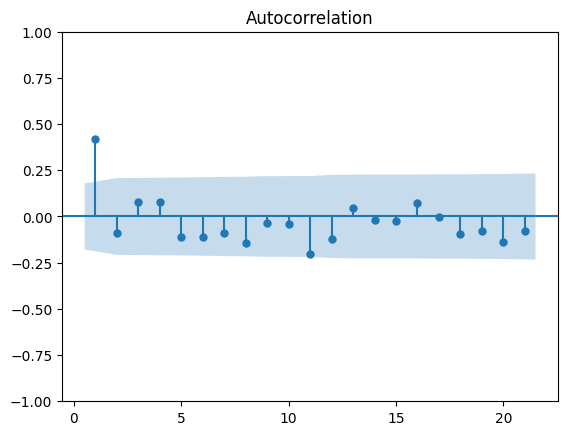

In [ ]:
plot_acf(ma1, zero=False)
plt.show()

Bagaimana interpretasi plot ACF di atas?

Ada kecurigaan tapi bisa diuji dengan Ljung-Box. Karena Ma1 nilai positif pasti Plot ACF di lag 1 pasti nilainya positif seperti yang terlihat. Jadi nilai autkorelasi [-0.5, 0.5].

Transformasi tidak berkaitan dengan mdoel signifikan atau tidak tetapi berkaitan dengan asumsi model yang tidak terpenuhi.

Contoh lain untuk simulasikan deret MA (1) kita lakukan secara manual berdasarkan persamaan proses MA (1) dengan $\theta=0.7$.

In [8]:
np.random.seed(1302)
theta=0.7
et=[np.random.normal(0,1)] #Sebaran Normal baku untuk et. Yang terpenting adalah Rata-ratanya 0 dan ragamnya bebas. Ragam kecil mengindikasikan fluktuasi semakin kecil, tapi ragam besar maka fluktuasi semakin besar.
ma1_m=[]
for i in range(120):
    et.append(np.random.normal(0,1))
    ma1_m.append(et[i+1]-theta*et[i]) #Disini kita tidak mendefinisikan Yt-1 di awal karena yang diperlukan untuk model Ma 1 di awal hanya Et. 

# Selain itu, MA tidak membutuhkan asumsi kestasioneran tapi modelnya stasioner. Akan tetapi AR yang membutuhkan syarat kestasioneran sehingga untuk MA
# kita tidak mempretimbangkan thetanya berapa tetapi AR mempertimbangkan theta. thtea pada MA tidak berpengaruh pada stasioner tapi mungkin berpengaruh pada autokorelasinya.

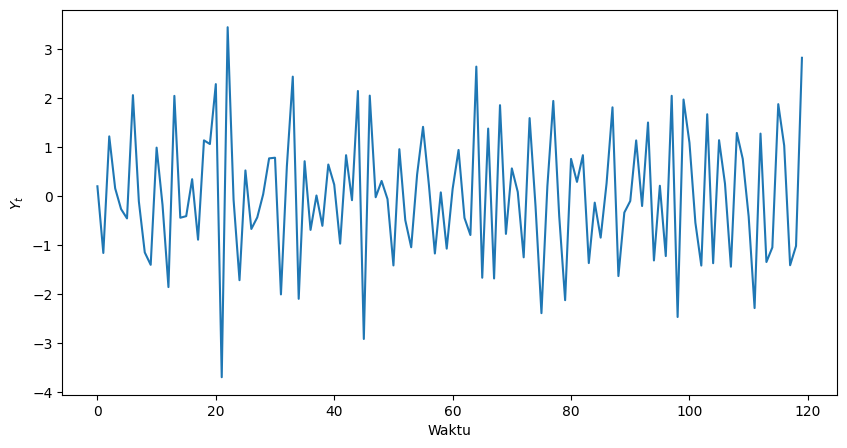

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ma1_m)
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

Kalau ragam kecil fluktuasi semakin kecil, kalau ragam besar maka fluktuasi semakin besar.

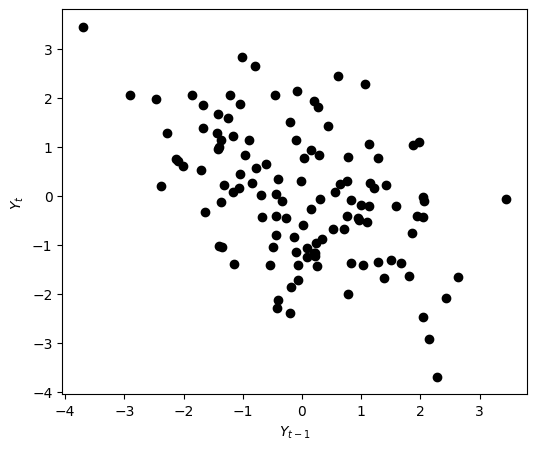

In [9]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma1_m), lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Apa insight yang Anda peroleh?

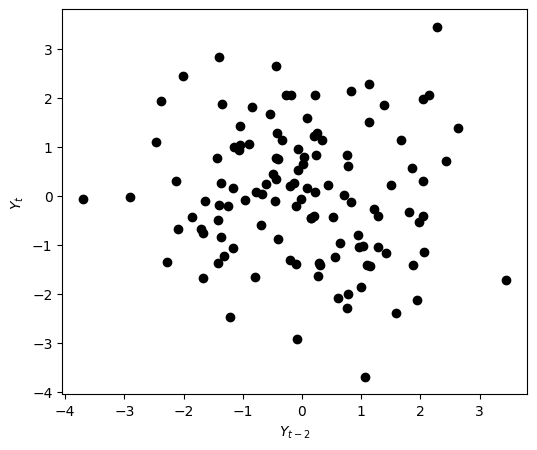

In [10]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma1_m), lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Bagaimana interpretasi Anda?

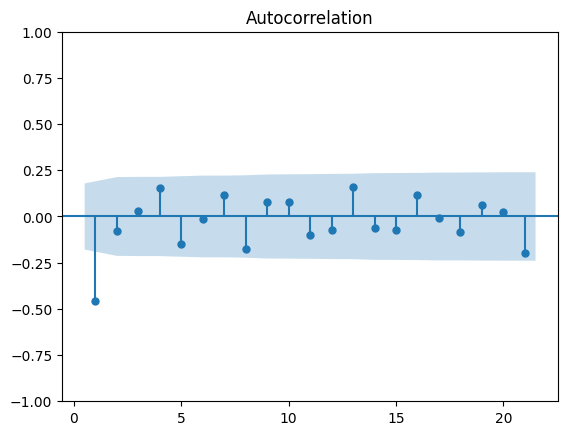

In [11]:
plot_acf(np.array(ma1_m), zero=False)
plt.show()

Apa makna dari plot ACF di atas?

## MA (2)

Proses MA (2) memiliki persamaan:

<center> $Y_t=e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}$ </center>

Kita akan simulasikan proses MA (2) dengan $\theta_1=1$ dan $\theta_2=-0.6$

Nilai autokorelasi pada MA2 tidak berlaku autkorelasi pada rentang [-0.5, 0.5], ini hanya berlaku pada MA1. 

In [12]:
np.random.seed(223)
ar1 = np.array([1]) 
ma1 = np.array([1, -1, 0.6]) #MA selalu berlawanan tanda dengan yang diinginkan. Jadi disini theta 1 = 1 maka dimasukan  -1, thta 2 =-0.6 maka ditulis 0.6
ma_object2 = ArmaProcess(ar1,ma1)
ma2 = ma_object2.generate_sample(nsample=120)

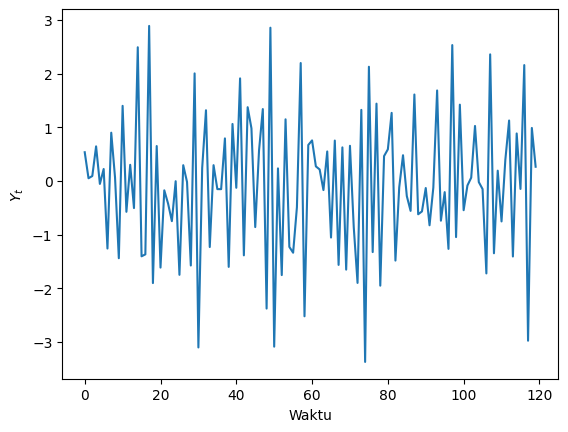

In [13]:
plt.figure()
plt.plot(ma2)
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

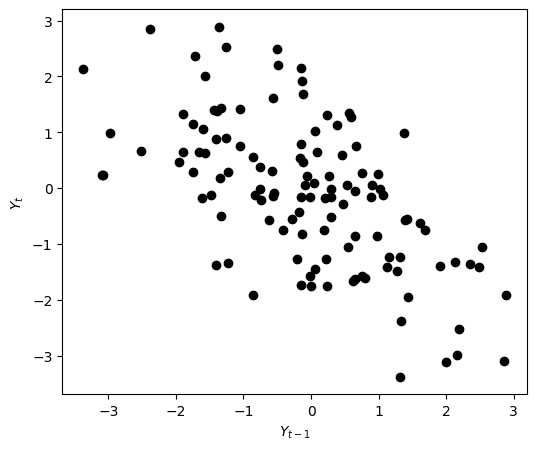

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma2), lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Bagaimana interpretasi Anda dari plot-plot di atas?

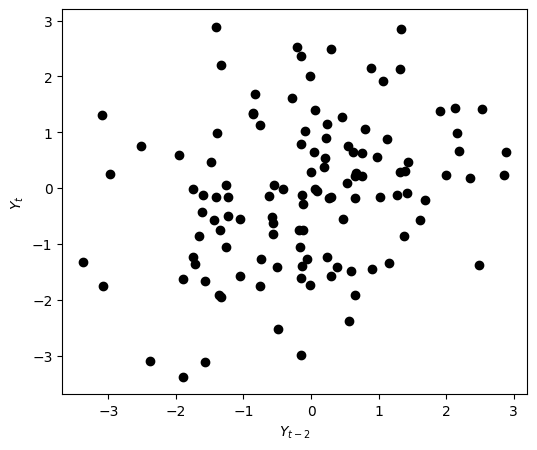

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma2), lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

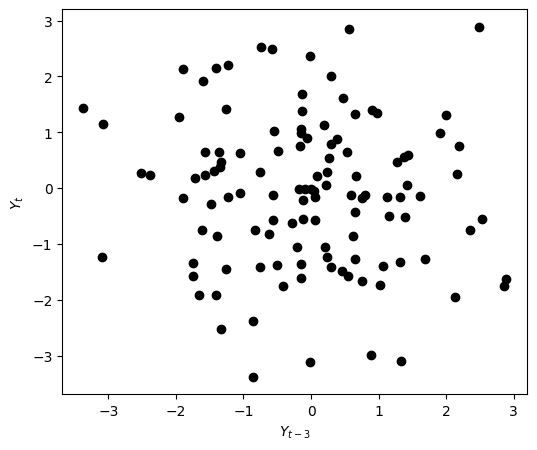

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ma2), lag=3, c='k')
plt.xlabel(r'$Y_{t-3}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Apa insight yang Anda peroleh dari plot-plot di atas?

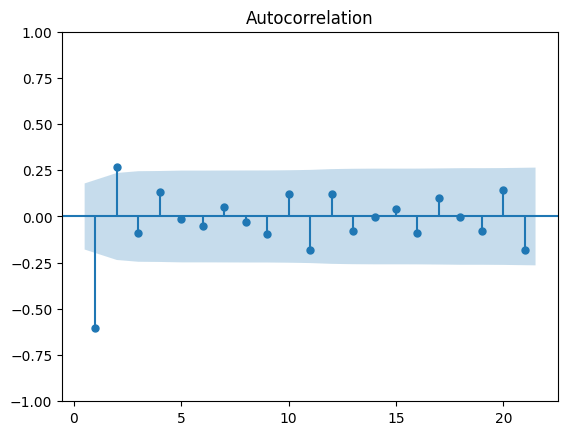

In [ ]:
plot_acf(ma2, zero=False)
plt.show()

Bagaimana interpretasi plot ACF di atas?

Contoh deret simulasi lain untuk MA (2) kita lakukan secara manual berdasarkan persamaan proses MA (2) dengan $\theta_1=-0.5$ dan $\theta_2=-0.7$.

Belum ada deretnya, ditambahkan deret

In [ ]:
np.random.seed(1)
theta1, theta2=-0.5, -0.7
ma2_m=[]
et=[np.random.normal(0,1),np.random.normal(0,1)]
for i in range(120):
    et.append(np.random.normal(0,1))
    ma2_m.append(et[i+2]-theta1*et[i+1]-theta2*et[i])

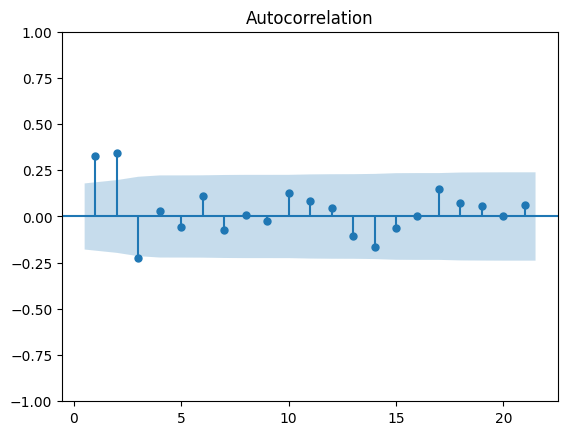

In [ ]:
plot_acf(np.array(ma2_m), zero=False)
plt.show()

## Apakah rho1 bergantung pada theta 1 atau theta 2

#Kemudian MA3 silahkan diturunkan sendiri

<h1> Autoregressive </h1>

Secara spesifik, proses autoregressive order p dari deret ${Y_t}$ memenuhi persamaan berikut:

<center> $Y_t=\phi_1 Y_{t-1}+\phi_2 Y_{t-2}+...+\phi_p Y_{t-p}+e_t$ </center>

Nilai $Y_t$ pada waktu sekarang merupakan kombinasi linier dari sebanyak p nilai $Y_t$ pada waktu lampau ditambah $e_t$ yang saling bebas terhadap $Y_{t-1}, Y_{t-2},...$.


<h2> AR (1) </h2>

Proses AR (1) memiliki persamaan:

<center> $Y_t=\phi Y_{t-1}+e_t$ </center>

**Syarat kestasioneran untuk deret AR (1) adalah jika dan hanya jika $|\phi|<1$.**

Kita simulasikan deret AR (1) dengan $\phi=0.9$

In [ ]:
np.random.seed(1302)
ar1 = np.array([1,0.9])
ma1 = np.array([1])
ar_object1 = ArmaProcess(ar1,ma1)
ar1 = ar_object1.generate_sample(nsample=120)

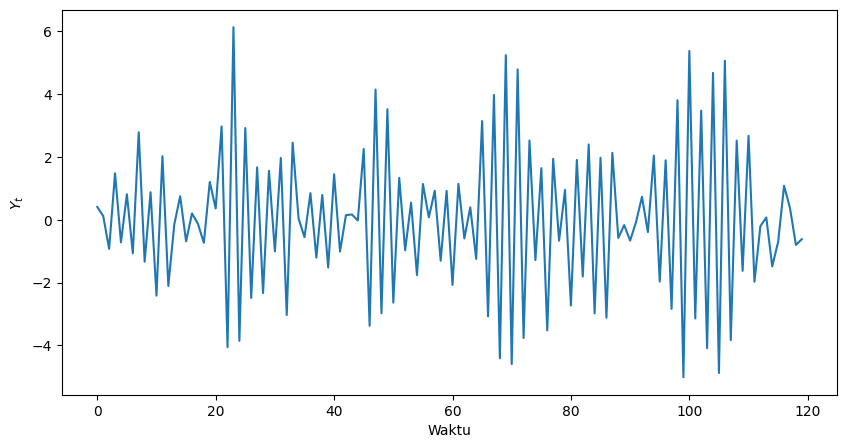

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ar1)
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

Bagaimana interpretasi Anda dari plot tersebut?

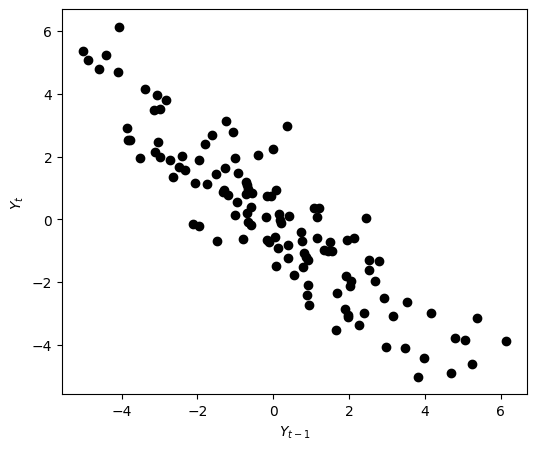

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ar1), lag=1, c='k')
plt.xlabel(r'$Y_{t-1}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

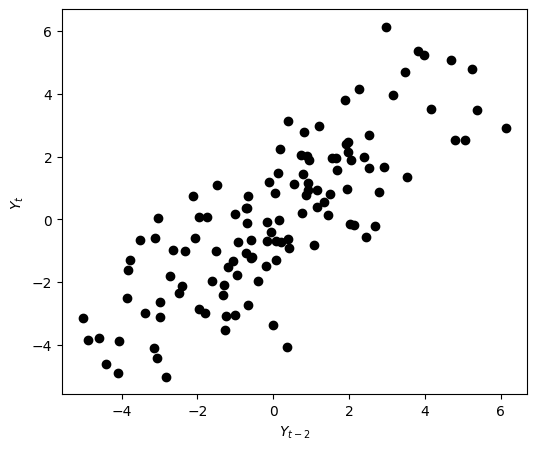

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ar1), lag=2, c='k')
plt.xlabel(r'$Y_{t-2}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

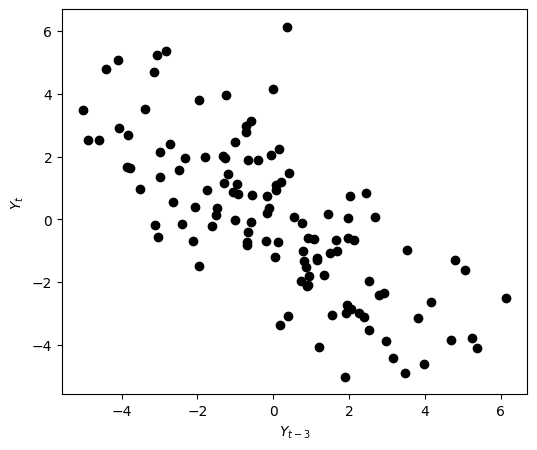

In [ ]:
plt.figure(figsize=(6,5))
pd.plotting.lag_plot(pd.DataFrame(ar1), lag=3, c='k')
plt.xlabel(r'$Y_{t-3}$'),plt.ylabel(r'$Y_{t}$')
plt.show()

Bagaimana perbedaan plot pencar pada model AR dengan MA?

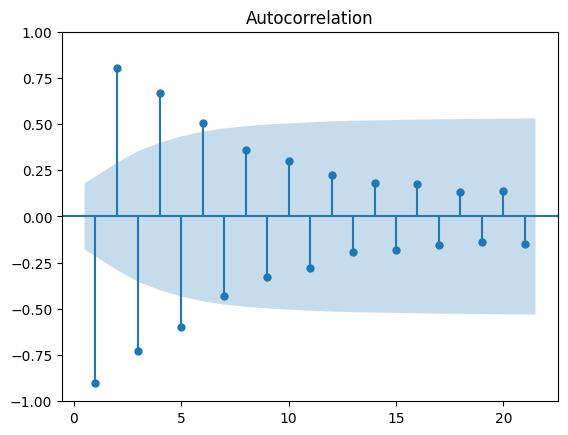

In [ ]:
plot_acf(ar1, zero=False)
plt.show()

Pola tersebut sudah stasioner tapi komponen MA nya yang tidak ada.

Dari plot ACF contoh tampak nilai autokorelasi yang cukup tinggi dan signifikan sampai lag 6. Perhatikan bahwa nilai autokorelasi bergantian tanda dari negatif ke positif.

**Karena $|\phi|<1$, nilai fungsi autokorelasi berkurang secara eksponensial seiring dengan meningkatnya jumlah lag k. Jika $0<\phi<1$, semua korelasinya bernilai positif, dan jika $-1<\phi<0$, autokorelasi pada lag 1 bernilai negatif dan tanda untuk autokorelasi yang berurutan bergantian dari positif ke negatif, dengan nilainya berkurang secara eksponensial.**

Berdasarkan sifat tersebut, maka nilai ACF contoh tidak dapat kita gunakan untuk menentukan order dari proses AR, sehingga kita butuh alat lain. **PACF (Partial Autocorelation Function) contoh** merupakan salah satu alat yang bisa kita gunakan untuk menentukan order dari model AR.

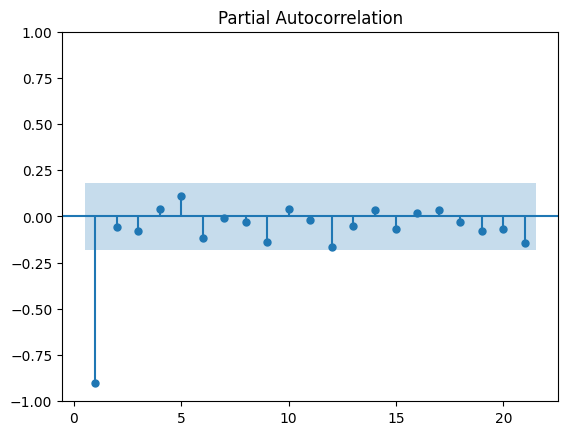

In [ ]:
plot_pacf(ar1, zero=False)
plt.show()

Apa makna dari plot PACF tersebut?

Contoh lain deret simulasi untuk AR (1) kita lakukan secara manual berdasarkan persamaan proses AR (1) dengan $\phi=-0.8$.

In [ ]:
np.random.seed(1323)
phi=-0.8
ar1_2=[np.random.uniform(0,1)]
for i in range(100):
    ar1_2.append(phi*ar1_2[i]+np.random.normal(0,1))

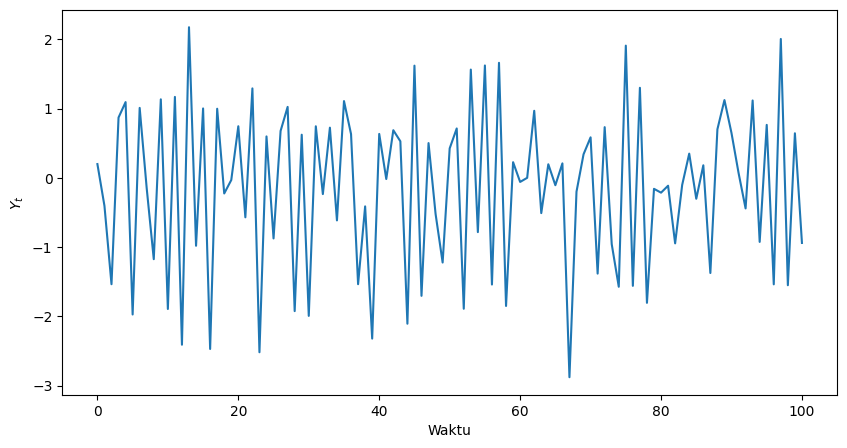

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ar1_2)
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

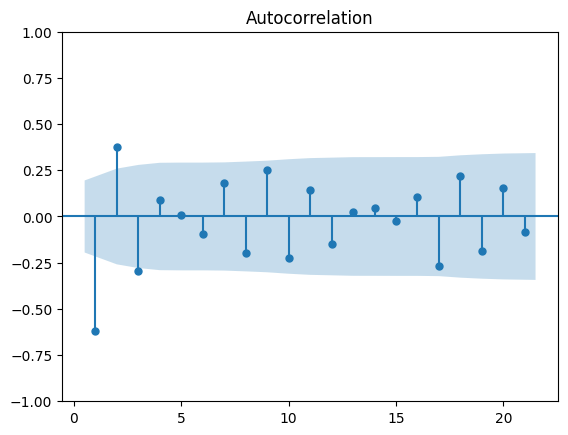

In [ ]:
plot_acf(np.array(ar1_2), zero=False)
plt.show()

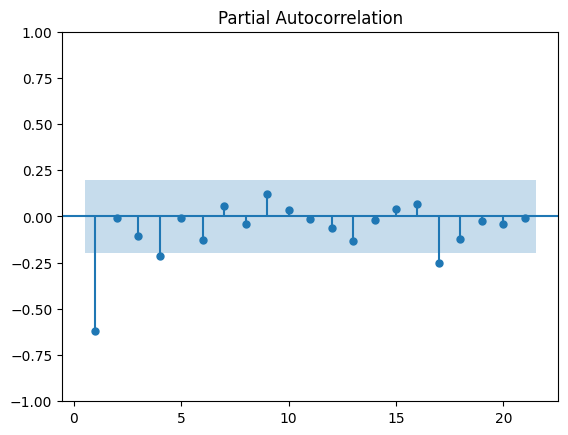

In [ ]:
plot_pacf(np.array(ar1_2), zero=False)
plt.show()

Plot PACF contoh menyarankan model AR (1) untuk deret.

<h2> AR (2) </h2>

Proses AR (2) memiliki persamaan:

<center> $Y_t=\phi_1 Y_{t-1}+\phi_2 Y_{t-2}+e_t$ </center>

**Syarat kestasioneran untuk deret AR (1) adalah jika dan hanya jika tiga kondisi berikut terpenuhi, yaitu:**

**<center> $\phi_1+\phi_2<1$  ,   $\phi_2-\phi_1<1$ ,   $|\phi_2|<1$ </center>**

Kita simulasikan deret AR (2) dengan $\phi_1=1.5$ dan $\phi_2=-0.75$

In [ ]:
np.random.seed(1)
psi1, psi2=1.5,-0.75
ar2=[np.random.uniform(0,1),np.random.uniform(0,1)]
for i in range(130):
    ar2.append(psi1*ar2[i+1]+psi2*ar2[i]+np.random.normal(0,1))

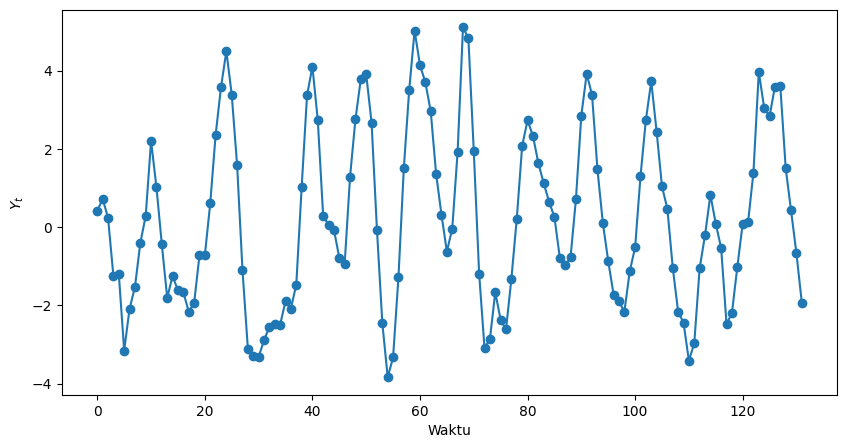

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(ar2,'-o')
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

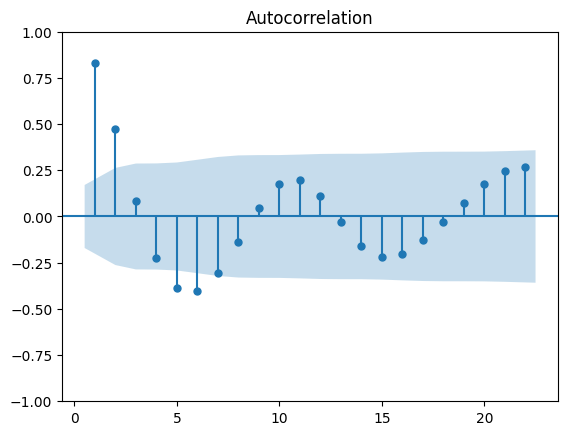

In [ ]:
plot_acf(np.array(ar2), zero=False)
plt.show()

Perhatikan pola ACF tersebut. Apa kaitan pola yang terbentuk dengan sifat dari proses AR?

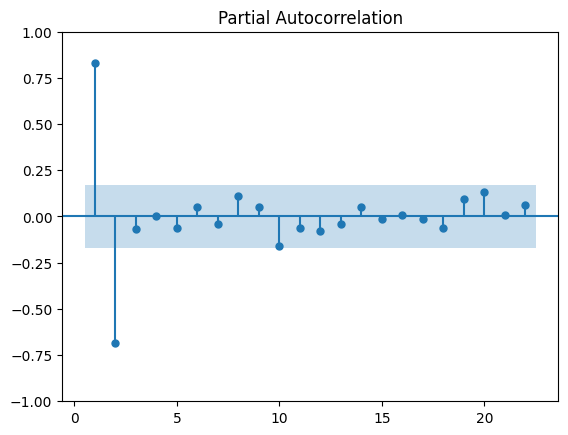

In [ ]:
plot_pacf(np.array(ar2), zero=False)
plt.show()

<h1> Model Campuran ARMA </h1>

Jika diasumsikan bahwa deret terdiri dari setengah autoregressive dan setengah lagi rataan bergerak, akan diperoleh model deret waktu yang cukup umum dengan persamaan:

<center> $Y_t=\phi_1 Y_{t-1}+\phi_2 Y_{t-2}+...+\phi_p Y_{t-p}+e_t-\theta_1 e_{t-1}-\theta_2 e_{t-2}-...-\theta_q e_{t-q}$ </center>

Dikatakan bahwa $ {Y_t} $merupakan proses campuran autoregressive moving averageorder p dan q, atau disingkat dengan ARMA(p,q).

<h2> ARMA (1,1) </h2>

Persamaan umum untuk proses ARMA (1,1) adalah:

<center> $Y_t=\phi Y_{t-1}+e_t-\theta e_{t-1}$ </center>

Kita simulasikan deret ARMA (1,1) dengan $\phi=0.6$ dan $\theta=-0.3$

In [ ]:
np.random.seed(2023)
ar1 = np.array([1,0.6])
ma1 = np.array([1,0.3])
arma_object1 = ArmaProcess(ar1,ma1)
arma1 = arma_object1.generate_sample(nsample=100)

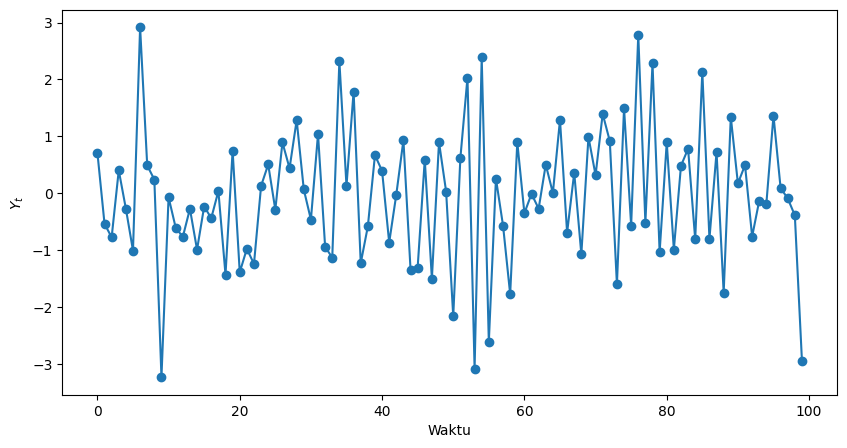

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(arma1,'-o')
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

Bagaimana pola dari deret tersebut?

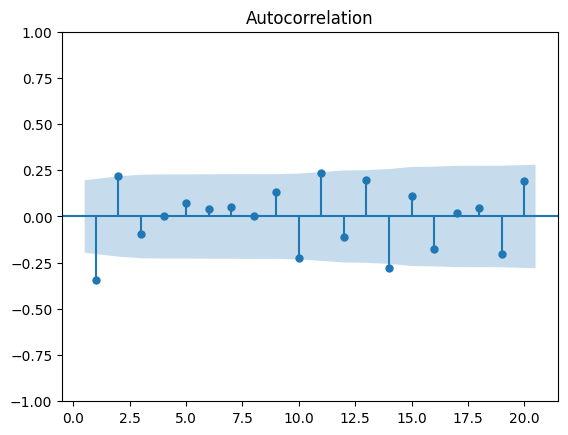

In [ ]:
plot_acf(arma1, zero=False)
plt.show()

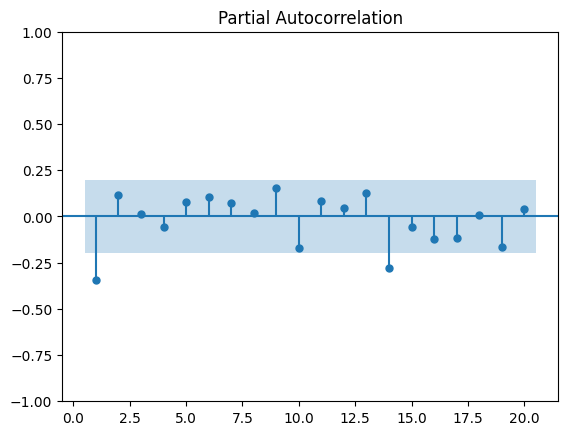

In [ ]:
plot_pacf(arma1, zero=False)
plt.show()

Berdasarkan plot ACF contoh contoh terlihat bahwa model yang disarankan adalah MA (2), hal ini tentu tidak sesuai dengan spesifikasi awal deret, dimana untuk komponen rataan bergerak kita definisikan proses MA (1). Sementara dari plot PACF contoh model yang disarankan adalah AR (1), tapi perhatikan bahwa nilai autokorelasi pada lag 2 sepertinya sedikit signifikan. Sehingga model yang sesuai berdasarkan plot ACF dan PACF contoh adalah model AR (1) atau MA (2), dimana seharusnya model yang digunakan adalah ARMA (1,1). Hal ini bisa saja terjadi, sehingga dalam pemodelan deret waktu biasanya digunakan beberapa model tentatif dengan melakukan *overfitting* atau *underfitting* dari model yang disarankan oleh ACF dan PACF.

Kita simulasikan deret ARMA (1,1) yang lainnya secara manual berdasarkan persamaan proses ARMA (1,1) dengan $\phi=0.75$ dan $\theta=0.4$

In [ ]:
np.random.seed(213)
psi1, tetha1=0.75,0.4
et=[np.random.uniform(0,1)]
arma11=[np.random.uniform(0,1)]
for i in range(120):
    et.append(np.random.uniform(0,1))
    arma11.append(psi1*arma11[i]+et[i+1]-tetha1*et[i])

arma11=arma11[21:]

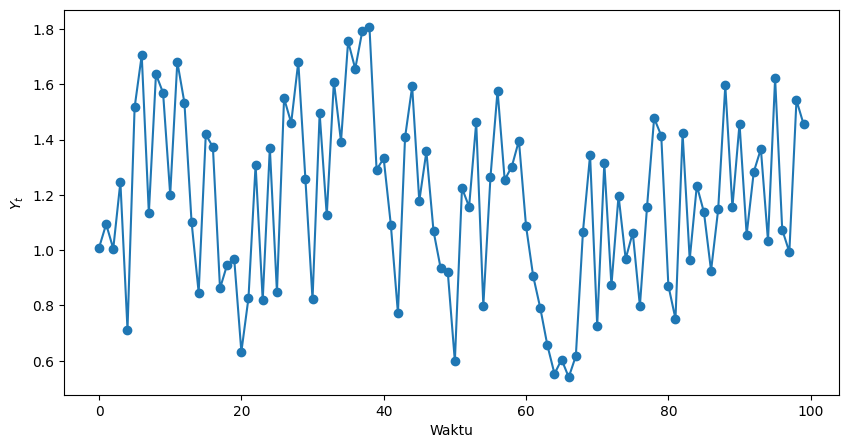

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(arma11,'-o')
plt.xlabel('Waktu'), plt.ylabel(r'$Y_t$')
plt.show()

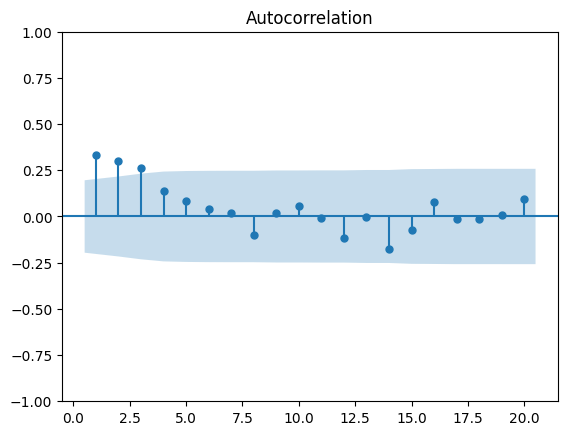

In [ ]:
plot_acf(np.array(arma11), zero=False)
plt.show()

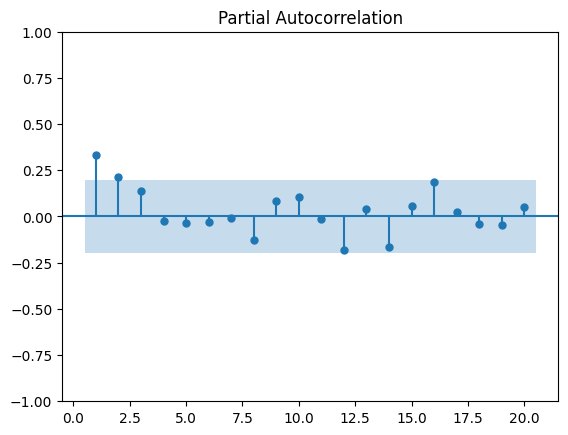

In [ ]:
plot_pacf(np.array(arma11), zero=False)
plt.show()

Perhatikan plot ACF dan PACF contoh di atas, apa interpretasi Anda?

<h2> TUGAS KELOMPOK </h2>

Masing-masing kelompok gunakan set.seed jumlah 2 digit terakhir NIM semua anggota kelompok.

1. Buatlah simulasi deret MA (1) dengan panjang pengamatan 20 dengan nilai parameter $\theta=0.1, \theta=0.3, \theta=0.7, \theta=1.0, \theta=1.5, \theta=2.0$
   
2. Buatlah plot ACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 1 dan bandingkan. Berdasarkan plot ACF tersebut apa yang dapat Anda simpulkan terkait nilai autokorelasi pada lag 1?

3. Buatlah simulasi deret MA (1) dengan parameter $\theta=0.25$ dengan panjang pengamatan 60,100,150,300.

4. Buatlah plot ACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 3 dan bandingkan. Berdasarkan plot ACF tersebut apa yang dapat Anda simpulkan terkait nilai autokorelasi pada lag 1?

5. Buatlah simulasi deret MA (2) dengan panjang pengamatan 50 dengan parameter:
   
   a. $\theta_1=0.3, \theta_2=0.8$
   
   b. $\theta_1=-0.3, \theta_2=0.8$
   
   c. $\theta_1=0.3, \theta_2=-0.8$
   
   d. $\theta_1=-0.3, \theta_2=-0.8$

6. Buatlah plot ACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 5 dan bandingkan. Berdasarkan plot ACF tersebut apa yang dapat Anda simpulkan terkait nilai autokorelasi pada lag 1 dan 2?

7. Buatlah simulasi deret AR (1) 100 pengamatan dengan nilai parameter $\phi=0.3, \phi=0.9, \phi=-0.3, \phi=-0.9$

8. Buatlah plot ACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 7 dan bandingkan. Berdasarkan plot ACF tersebut apa yang dapat Anda simpulkan terkait nilai autokorelasi?

9. Buatlah plot PACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 7. Berdasarkan plot ACF dan PACF, model apa yang disarankan untuk masing-masing deret?

9. Buatlah simulasi deret AR (2) dengan panjang pengamatan 100 dengan parameter:
   
   a. $\phi_1=1.5, \phi_2=-0.5$
   
   b. $\phi_1=0.75, \phi_2=-0.25$
   
   c. $\phi_1=1, \phi_2=-0.25$
   
   d. $\phi_1=0.5, \phi_2=-0.75$
   
10. Buatlah plot ACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 8. Berdasarkan plot ACF tersebut apa yang dapat Anda simpulkan terkait nilai autokorelasi?

11. Buatlah plot PACF dari masing-masing deret hasil simulasi yang Anda peroleh pada nomor 8. Berdasarkan plot ACF dan PACF, model apa yang disarankan untuk masing-masing deret?